In [1]:
!pip install mtcnn

In [2]:
# confirm installation
import mtcnn
print(mtcnn.__version__)

0.1.0


In [3]:
# importing libraries
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN

In [4]:
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
	# show the plot
	pyplot.show()
 

In [7]:
# load image from file
filename = 'test1.jpg'
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# detect faces positions in the image 
for face in faces:
    print(face)

{'box': [831, 56, 139, 188], 'confidence': 0.9999983310699463, 'keypoints': {'left_eye': (885, 126), 'right_eye': (948, 116), 'nose': (937, 162), 'mouth_left': (888, 195), 'mouth_right': (956, 183)}}
{'box': [674, 62, 114, 164], 'confidence': 0.9999924898147583, 'keypoints': {'left_eye': (721, 126), 'right_eye': (770, 121), 'nose': (761, 149), 'mouth_left': (730, 184), 'mouth_right': (774, 179)}}
{'box': [450, 342, 281, 382], 'confidence': 0.9999600648880005, 'keypoints': {'left_eye': (549, 474), 'right_eye': (685, 485), 'nose': (624, 549), 'mouth_left': (527, 603), 'mouth_right': (675, 615)}}
{'box': [1124, 85, 248, 282], 'confidence': 0.9999346733093262, 'keypoints': {'left_eye': (1179, 223), 'right_eye': (1269, 172), 'nose': (1226, 238), 'mouth_left': (1220, 305), 'mouth_right': (1319, 254)}}
{'box': [459, -20, 161, 189], 'confidence': 0.9998863935470581, 'keypoints': {'left_eye': (513, 35), 'right_eye': (585, 37), 'nose': (554, 79), 'mouth_left': (511, 112), 'mouth_right': (580, 11

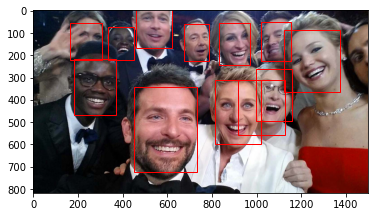

In [8]:
# display faces on the original image
draw_image_with_boxes(filename, faces)

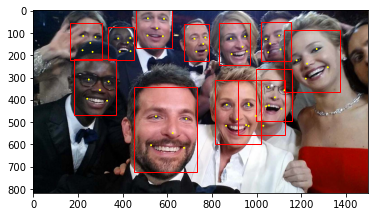

In [13]:
# we can even draw circles for eyes,nose and mouth.
from matplotlib.patches import Circle

def draw_image_with_boxes_circles(filename,result_list):
    # load the image
    data = pyplot.imread(filename)
    # plot the image
    pyplot.imshow(data)
    # get the context for drawing boxes
    ax = pyplot.gca()
    
    # plot each box
    for result in result_list:
        # getting coordinates
        x,y,width,height = result['box']
        # creating the shape
        rect = Rectangle((x,y),width,height,fill=False,color='red')
        # drawing the box
        ax.add_patch(rect)
        
        # for nose,eyes,mouth
        for key,value in result['keypoints'].items():
            dot = Circle(value,radius=2,color="yellow")
            ax.add_patch(dot)
    pyplot.show()
    
filename = "test1.jpg"
pixels = pyplot.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(pixels)
draw_image_with_boxes_circles(filename,faces)

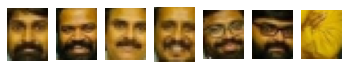

In [15]:
# draw each face separately
def draw_faces(filename,result_list):
    data = pyplot.imread(filename)
    # plot each face as a subplot
    for i in range(len(result_list)):
        x1,y1,width,height = result_list[i]['box']
        x2,y2 = x1 + width,y1 + height
        # defining subplot
        pyplot.subplot(1,len(result_list),i+1)
        pyplot.axis('off')
        pyplot.imshow(data[y1:y2,x1:x2])
    pyplot.show()
    
filename = 'test2.jpg'
pixels = pyplot.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(pixels)
draw_faces(filename,faces)

